## 项目背景
不吹牛集团这几年孵化了50个品牌，在各渠道做了大量品宣层面的曝光。现在集团首席吹牛官提了两个需求：

1. 要一张大表，包含每个月搜索人数TOP5的品牌相关数据，以及对应品牌在当月的搜索份额和排名。

2. 在现有数据基础上，找到最近一年投放效果还不错的品牌，要吹吹牛，做年度表彰。

这是小z特别准备的两个具有代表性的需求：

- 第一种：业务方已经定好了条条框框，需要数据分析师做的是取数和处理的工作，这样的“分析”工作，坑往往在于取数和清洗的复杂性。
- 第二种：业务方自己想了个模糊的方向，需要分析师结合实际数据，定逻辑，给建议。

## 数据预览

话音未落，集团首席吹牛官的跟屁虫就把相关源数据丢过来了

一共24张Excel表格，按月存储，涵盖了从2019年1月到2020年12月的数据。

表格内部数据大同小异：

查看19年1月份的样例数据

In [30]:
# 导入相关包
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('data/品牌投放/2019-01.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   品牌      50 non-null     object
 1   品牌搜索人数  50 non-null     int64 
 2   点击人数    50 non-null     int64 
 3   支付人数    50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [7]:
df.head()

,品牌,品牌搜索人数,点击人数,支付人数
0,七喜,770,590,22
1,万迅,1369,948,0
2,东方,1400,919,2
3,九方,955,531,6
4,佳禾,706,343,2


每张表都有50个品牌，包括了品牌名、品牌搜索人数、点击人数和对应的支付人数这几个关键字段。

源数据就是这样简简单单中又透漏着麻麻烦烦，接下来，我们就开始手撕需求。

## 项目一: 批量操作

开始动手前，我们要明确需求。

再回顾一下首席吹牛官的第一个需求：要一张大表，包含每个月搜索人数TOP5品牌的相关数据，以及对应品牌在当月的搜索份额和排名。

提炼：在现有源数据的基础上，我们还需要对各品牌月内按搜索人数排序，然后计算每个品牌搜索份额，取其前5，最后遍历汇总。

自动化之哥曾经说过：Python批量操作Excel，无论表格再多，处理逻辑再复杂，只要我们集中力量击破一张，就能够实现批量操作的全面胜利。

首先，我们要解决的是单张表的问题。
### 1.1 按搜索人数排名

In [8]:
df = df.sort_values('品牌搜索人数',ascending = False)
df.head()

,品牌,品牌搜索人数,点击人数,支付人数
14,同兴,41000,15519,519
7,凌云,31482,19783,1627
21,思优,30225,15804,502
43,菊风,18662,12686,101
22,恒聪,12525,8102,44


### 1.2 加上排名列

In [9]:
df['搜索人数排名'] = df['品牌搜索人数'].rank(ascending = False)
df.head()

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名
14,同兴,41000,15519,519,1.0
7,凌云,31482,19783,1627,2.0
21,思优,30225,15804,502,3.0
43,菊风,18662,12686,101,4.0
22,恒聪,12525,8102,44,5.0


### 1.3 计算搜索份额指标

再来计算搜索份额，搜索份额的计算公式：单品牌搜索人数/所有品牌搜索人数汇总，用Pandas计算，怎一个easy了的！

In [10]:
df['搜索份额'] = df['品牌搜索人数'] / df['品牌搜索人数'].sum()
df.head()

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名,搜索份额
14,同兴,41000,15519,519,1.0,0.182446
7,凌云,31482,19783,1627,2.0,0.140092
21,思优,30225,15804,502,3.0,0.134498
43,菊风,18662,12686,101,4.0,0.083044
22,恒聪,12525,8102,44,5.0,0.055735


### 1.4 改了需求，重点关注凌云品牌
正当我们准备批量执行操作，首席吹牛官发来了消息：

“需求一略有调整，投资人最关注的是凌云这个品牌，要求在汇总表中，每个月凌云品牌的相关指标排在最前面，后面跟着搜索排名TOP5的品牌”。

面对需求的临时改动，见过大风大浪的我们内心没有一丝波澜，甚至还有一点想笑。小事一桩，改改Pandas逻辑就好了。

先找到目标品牌凌云：

In [11]:
brand = '凌云'
brand_data = df.loc[df['品牌'].str.find(brand) != -1,:]
brand_data

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名,搜索份额
7,凌云,31482,19783,1627,2.0,0.140092


再按照顺延的逻辑，定位TOP5品牌相关数据：

In [12]:
other = df.loc[df['品牌'].str.find(brand) == -1,:]
other_top5 = other.iloc[:5,:]
other_top5

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名,搜索份额
14,同兴,41000,15519,519,1.0,0.182446
21,思优,30225,15804,502,3.0,0.134498
43,菊风,18662,12686,101,4.0,0.083044
22,恒聪,12525,8102,44,5.0,0.055735
47,银嘉,8759,5968,41,6.0,0.038977


合并即可获取我们想要的结果：

In [13]:
data = pd.concat([brand_data,other_top5])
data

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名,搜索份额
7,凌云,31482,19783,1627,2.0,0.140092
14,同兴,41000,15519,519,1.0,0.182446
21,思优,30225,15804,502,3.0,0.134498
43,菊风,18662,12686,101,4.0,0.083044
22,恒聪,12525,8102,44,5.0,0.055735
47,银嘉,8759,5968,41,6.0,0.038977


单表操作完成，批量操作，只需要建立好循环+合并关系，并引入日期列，在合并结果中对不同的表数据做好区分：

### 1.5 循环执行

In [28]:
data_list = []

for name in os.listdir('data/品牌投放/'):
    df = pd.read_excel(f'data/品牌投放/{name}')
    df = df.sort_values('品牌搜索人数',ascending = False)
    df['搜索人数排名'] = df['品牌搜索人数'].rank(ascending = False)
    df['搜索份额'] = df['品牌搜索人数'] / df['品牌搜索人数'].sum()
    
    brand = '凌云'
    brand_data = df.loc[df['品牌'].str.find(brand) != -1,:]
    
    other = df.loc[df['品牌'].str.find(brand) == -1,:]
    other_top5 = other.iloc[:5,:]
    data = pd.concat([brand_data,other_top5])
    data['日期'] = name[:-5]
    
    data_list.append(data)

result = pd.concat(data_list)
result.head(8)

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名,搜索份额,日期
7,凌云,31482,19783,1627,2.0,0.140092,2019-01
14,同兴,41000,15519,519,1.0,0.182446,2019-01
21,思优,30225,15804,502,3.0,0.134498,2019-01
43,菊风,18662,12686,101,4.0,0.083044,2019-01
22,恒聪,12525,8102,44,5.0,0.055735,2019-01


Pandas批量操作，就是如此丝滑~

第一个需求搞定。

## 项目二: 品牌投放分析

还记得那个明（che）确（dan）的需求二吗？
“在现有数据基础上，找到最近一年投放效果还不错的品牌，要吹吹牛，做年度表彰。”

首席吹牛官以成本数据过于机密为由，除了说各品牌费用基本无差别之外，没有透露任何关于成本方面的数据，我们自然也无法计算投放ROI了这些核心指标了。

目前能够拿到的，只有品牌、搜索人数、点击人数和对应支付人数这几个指标。

要找到最近一年投放效果还不错的品牌，我们可以用漏斗思维，从量级（人数）和效率（转化率）两个角度来考虑：

在费用无差别的情况下：

- 人群基数大（搜索人数），表示投放的心智效果不错，让更多用户被广告触达后，在平台主动搜相关的品牌。
- 搜索-点击转化率高，代表了搜索结果的精准度，搜索后展示页面的吸引力等等
- 点击-支付转化率高，更可能受产品详情页面、活动力度等影响

在项目二场景中，三个指标越高越好。接下来，我们就结合搜索人数，搜索-点击转化率和点击-支付转化率，用Pandas做一波分析。

### 2.1 筛选出2020年订单

要对最近一年的数据做分析，我们先把2020年所有数据合并，拿到汇总表：

In [29]:
data_list = []
for name in os.listdir('data/品牌投放/'):
    df = pd.read_excel(f'data/品牌投放/{name}')
    df['日期'] = name[:-5]
    data_list.append(df)
    
final = pd.concat(data_list)
final_last = final.loc[final['日期'].str.find('2020') != -1,:]

print('数据行数：{}'.format(len(final_last)))
final_last.head()

数据行数：600


,品牌,品牌搜索人数,点击人数,支付人数,日期
0,七喜,96885,46896,4692,2020-01
1,万迅,30070,21386,4393,2020-01
2,东方,354060,72224,7544,2020-01
3,九方,244846,103363,17097,2020-01
4,佳禾,6547,3257,337,2020-01


###  2.2 提取关键字段，按品牌分组

In [21]:
gp = final_last.groupby('品牌')[['品牌搜索人数','点击人数','支付人数']].sum().reset_index()
gp = gp.sort_values('品牌搜索人数',ascending = False)
gp.head()

,品牌,品牌搜索人数,点击人数,支付人数
12,双敏,1604198,571399,61244
3,九方,1552916,712139,101217
20,巨奥,1417267,512847,45790
15,商软,1002679,544392,72050
24,戴硕,920350,540284,30371


### 2.3 计算关键字段

In [22]:
gp['搜索-点击转化率'] = gp['点击人数'] / gp['品牌搜索人数']
gp['点击-支付转化率'] = gp['支付人数'] / gp['点击人数']
gp.head()

,品牌,品牌搜索人数,点击人数,支付人数,搜索-点击转化率,点击-支付转化率
12,双敏,1604198,571399,61244,0.356190,0.107183
3,九方,1552916,712139,101217,0.458582,0.142131
20,巨奥,1417267,512847,45790,0.361856,0.089286
15,商软,1002679,544392,72050,0.542937,0.132349
24,戴硕,920350,540284,30371,0.587042,0.056213


基础数据齐活了！

从仅有的head5数据可以看到，双敏品牌以160万的搜索人数独占鳌头，但是！排名第二的九方，虽然搜索人数少了40多万，却能凭借较高的搜索-点击转化率和点击-支付转化率，在支付人数上远超双敏，成为支付之王。

表格太晦涩，我们画个图吧：

注：因为分析背景是无差别投放，搜索人数重要性非常高，为了可视化简洁清晰，我们简单粗暴的筛选TOP15品牌来绘图

### 2.4 设置字体避免中文

In [25]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

### 2.5 TOP15搜索品牌图形绘制

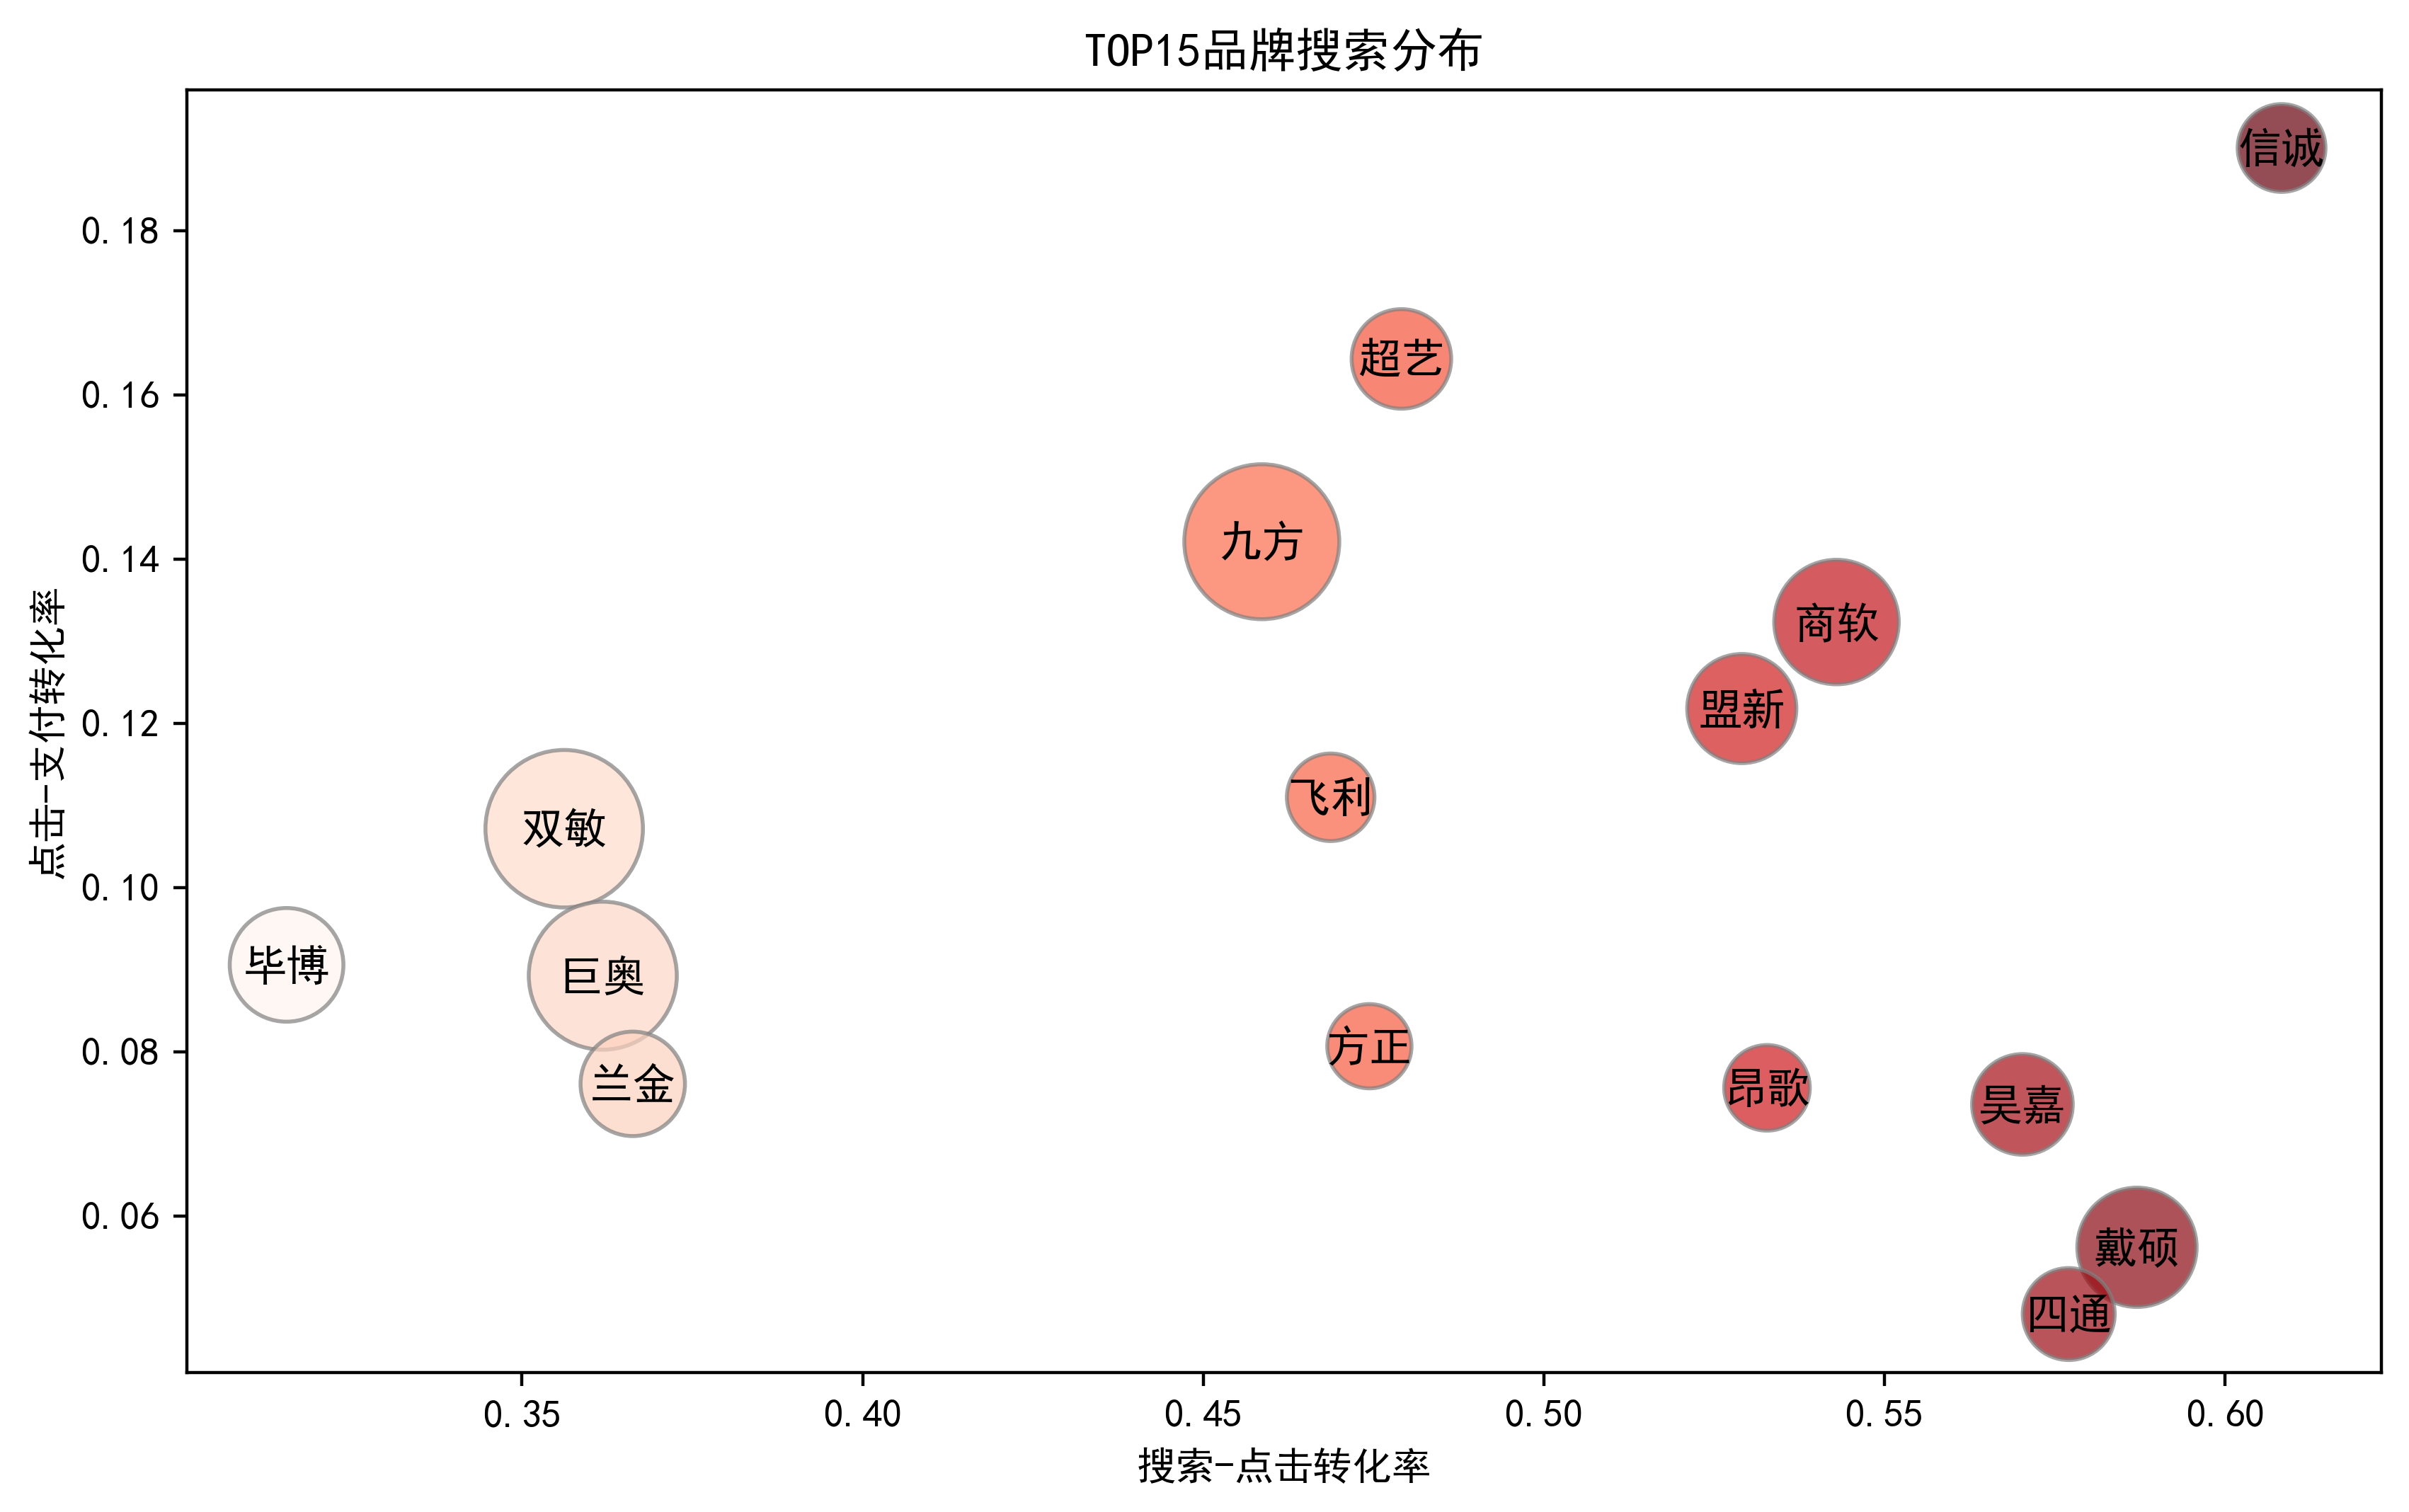

In [26]:
draw_data = gp.iloc[:15,:]

my_dpi=80
plt.figure(figsize=(800/my_dpi, 480/my_dpi), dpi=my_dpi * 5)
 
x = draw_data['搜索-点击转化率'].to_list()
y = draw_data['点击-支付转化率'].to_list()
z = draw_data['品牌搜索人数']
text = draw_data['品牌'].to_list()
plt.scatter(x, y, s = z / 1000, c = x, cmap = "Reds", alpha = 0.7, edgecolors = "grey", linewidth = 1)

for i,txt in enumerate(text):
    plt.text(x=x[i], y=y[i], s=txt, size=11, horizontalalignment='center', verticalalignment='center')

plt.xlabel("搜索-点击转化率")
plt.ylabel("点击-支付转化率")
plt.title("TOP15品牌搜索分布")

plt.show()

根据气泡图，我们按照搜索-点击转化率和点击-支付转化率的高低划分了4个区间：

区间1：高搜索-点击转化，高点击-支付转化

区间2：低搜索-点击转化，高点击-支付转化

区间3：低搜索-点击转化，低点击-支付转化

区间4：高搜索-点击转化，低点击-支付转化

再结合数据表，看的更加清晰：

,品牌,品牌搜索人数,点击人数,支付人数,搜索-点击转化率,点击-支付转化率
12,双敏,1604198,571399,61244,36%,11%
3,九方,1552916,712139,101217,46%,14%
20,巨奥,1417267,512847,45790,36%,9%
15,商软,1002679,544392,72050,54%,13%
24,戴硕,920350,540284,30371,59%,6%
35,毕博,835493,263549,23879,32%,9%
38,盟新,769771,407238,49607,53%,12%
6,兰金,705190,258279,19659,37%,8%
31,昊嘉,654808,373391,27486,57%,7%
45,超艺,640732,306960,50461,48%,16%


0.6082656432745605

In [87]:
max_v = draw_data[['搜索-点击转化率', '点击-支付转化率']].max().max()

(
    draw_data.style
    .set_properties(**{'text-align': 'center'})
    .format({'搜索-点击转化率':"{:.0%}", '点击-支付转化率': "{:.0%}"})
    .bar(subset=['搜索-点击转化率', '点击-支付转化率'], vmin=0, vmax=max_v, color='yellow')
)

,品牌,品牌搜索人数,点击人数,支付人数,搜索-点击转化率,点击-支付转化率
12,双敏,1604198,571399,61244,36%,11%
3,九方,1552916,712139,101217,46%,14%
20,巨奥,1417267,512847,45790,36%,9%
15,商软,1002679,544392,72050,54%,13%
24,戴硕,920350,540284,30371,59%,6%
35,毕博,835493,263549,23879,32%,9%
38,盟新,769771,407238,49607,53%,12%
6,兰金,705190,258279,19659,37%,8%
31,昊嘉,654808,373391,27486,57%,7%
45,超艺,640732,306960,50461,48%,16%


结果显而易见，高搜索量级的品牌，主要呈现出两种形态：

以双敏（排名第1）、巨奥（排名第3）为代表的品牌主要分布在第三区间，量级较大，但两种转化效率均需要进一步提升，品牌没能较好的承接蜂拥而至的流量。

九方（排名第2）、商软（排名第4）则是高搜索量级、高转化效率的代表，从现有数据看，他们才是不吹牛集团学习的榜样。

正当我们准备把这一步结果同步给首席吹牛官，顺便探讨进一步的数据分析方向，比如结合支付人数的金额贡献、留存率、LTV，以及引入两年增速的维度，结合业务动作来定位深层原因。

没想到首席吹牛官发来了这样的消息：

“第二个需求我可能没说清楚，这次不仅是表彰，也是给融资机构秀肌肉的一部分，我们关注的只是品牌声量，对应的就是品牌搜索人数这个指标，你汇总好排个序就好”

我们每个人会说超过5种语言的脏话，但在这个场景，大部分人只能条件反射般的打出这8个字：

> “嗯嗯，好的，马上给到”